In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
print(tf.__version__)

2.20.0


In [6]:
tf.config.list_physical_devices('GPU')

[]

In [7]:
print("GPUs available:", tf.config.list_physical_devices('GPU'))

GPUs available: []


In [8]:
df=pd.read_csv('Churn_Modelling.csv')

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().value_counts()

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age    Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
False      False       False    False        False      False   False  False   False    False          False      False           False            False     10000
Name: count, dtype: int64

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [8]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
geography=pd.get_dummies(x['Geography'],dtype=int,drop_first=True)

In [10]:
gender=pd.get_dummies(x['Gender'],dtype=int,drop_first=True)

In [11]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [12]:
x=x.drop(['Geography','Gender'],axis=1)

In [13]:
x=pd.concat([x,geography,gender],axis=1)

In [14]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [19]:
y_train

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 8000, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc=StandardScaler()

In [22]:
feature_names=x.columns

In [23]:
x_train=sc.fit_transform(x_train)

In [24]:
x_test=sc.transform(x_test)

In [25]:
x_train.shape

(8000, 11)

In [26]:
y_train.shape

(8000,)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import PReLU,ReLU,ELU
from tensorflow.keras.layers import Dropout

In [28]:
classifier=Sequential()

In [29]:
classifier.add(Dense(units=11,activation='relu'))

In [30]:
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [31]:
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [32]:
classifier.add(Dense(1,activation='sigmoid'))

In [33]:
import tensorflow

In [34]:
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [35]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

Early Stopping

In [36]:
early_stopping=tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=15,
    verbose=1,
    mode="auto",
    baseline=None,restore_best_weights=True,
)

In [37]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=[early_stopping])

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7343 - loss: 0.5720 - val_accuracy: 0.7959 - val_loss: 0.4734
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8018 - loss: 0.4770 - val_accuracy: 0.8061 - val_loss: 0.4390
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8121 - loss: 0.4535 - val_accuracy: 0.8152 - val_loss: 0.4237
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8205 - loss: 0.4364 - val_accuracy: 0.8201 - val_loss: 0.4077
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8285 - loss: 0.4144 - val_accuracy: 0.8300 - val_loss: 0.3950
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8365 - loss: 0.4016 - val_accuracy: 0.8387 - val_loss: 0.3836
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8380 - loss: 0.3938 - val_accuracy: 0.8466 - val_loss: 0.3776
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8433 - loss: 0.3882 - 

In [38]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

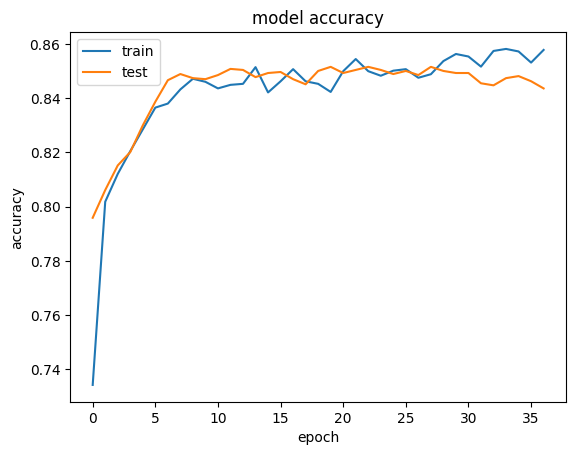

In [39]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

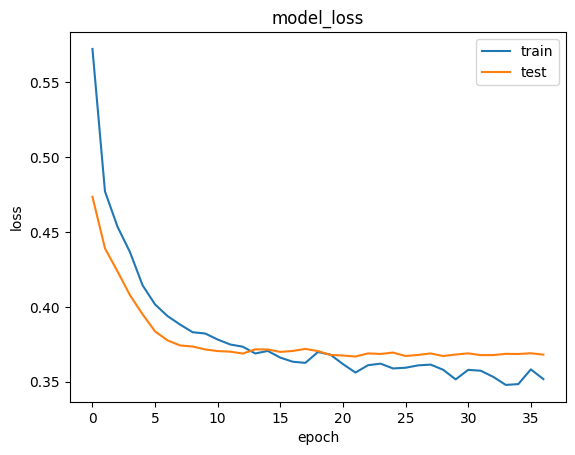

In [40]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

making the prediction part

In [ ]:
y_pred=(classifier.predict(x_test)>=0.5).astype(int).ravel()
y_pred_df=pd.DataFrame(data=y_pred)
y_pred_df.value_counts()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


0
0    1769
1     231
Name: count, dtype: int64

making the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1541,   54],
       [ 228,  177]])

calculating the accuracy

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
score=accuracy_score(y_test,y_pred)

In [45]:
score

0.859

checking the weights acc to each and every layer

In [46]:
classifier.get_weights()

[array([[-0.02764562,  0.03212013, -0.37149575, -0.1516521 ,  0.01272099,
         -0.12024771,  0.11132697,  0.29111117, -0.03962874, -0.00932097,
          0.2554748 ],
        [ 0.37239552, -0.773556  ,  0.15518253,  0.29550776, -0.23123558,
          0.3919062 ,  0.5209077 , -0.31666163,  0.3495862 ,  0.1966854 ,
         -0.6014941 ],
        [-0.03488334,  0.00491093,  0.08385171, -0.01583441,  0.19173108,
          0.1642435 , -0.07101228, -0.29748946,  0.11076347, -0.0188802 ,
          0.12574357],
        [-0.1622253 ,  0.19517133, -0.14498875, -0.47656444, -0.28951788,
         -0.11804636,  0.00652787, -0.23176597, -0.5461389 ,  0.40508723,
         -0.5852814 ],
        [ 0.1804583 ,  0.06871606,  0.1907849 , -0.97116435,  0.8317826 ,
         -0.05791619, -0.80039006, -0.14700148, -1.0015258 ,  0.9639292 ,
         -0.04332027],
        [ 0.09874956, -0.14729321, -0.13467948,  0.00207478,  0.18455978,
          0.12135608, -0.04589947,  0.02723597, -0.12208913, -0.1350375

In [47]:
import pickle

In [48]:
filename='weights_of_model.pkl'

In [49]:
try:
  with open(filename, 'wb') as f:
    pickle.dump(classifier.get_weights(),f)
except pickle.PickleError as e:
  print(f"the message was : {e}")

In [50]:
classifier.save("churn_ann_model.keras")